In [3]:
import numpy as np
import random

In [2]:
class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [5]:
class KMeansCustom:
    
    def __init__(self, n_clusters=6, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        
        for i in range(self.n_clusters):
            cluster = Cluster(i, random.choice(X))
            clusters.append(cluster)
            
        for i in range(self.max_iters):
            
            labels = []
            
            for point in X:
                
                distances = []
                for cluster in clusters:
                    dis = cluster.distance(point)
                    distances.append([dis, cluster.name])
                
                sel_dis, sel_cluster_name = sorted(distances)[0]
                sel_cluster = clusters[sel_cluster_name]
                
                sel_cluster.points.append(point)
                labels.append(sel_cluster_name)
                
            for cluster in clusters:
                cluster.relocate()
                
        
        err = self.error(X, clusters, labels)
        
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        self.labels_ = labels
    
    def error(self, X, clusters, labels):
        err = 0
        for point, label in zip(X, labels):
            err += clusters[label].distance(point)
            
        return err
            
        
    

In [8]:
from sklearn.datasets import  make_blobs
import matplotlib.pyplot as plt

In [7]:
X, y = make_blobs(centers=3, random_state=42)

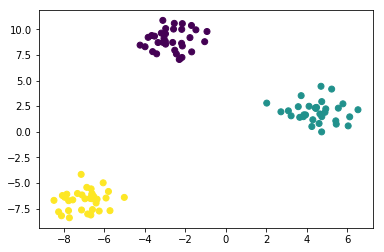

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

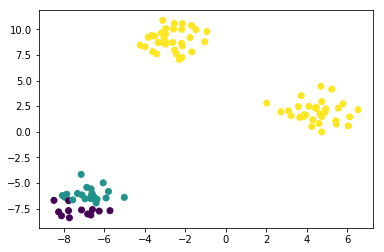

In [19]:
model = KMeansCustom(n_clusters=3)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)